In [1]:
# Tania Soutonglang A20439949
# CS 583-01 Spring 2024
# Assignment 1: Programming Assignments

from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

### Problem 4
We are given the following joint distribution over the random variables A, B, C, and D. Please answer the following questions. Show the necessary tables. You can (and should) share computations between different parts of the question. Usage of TableCPD is recommended.

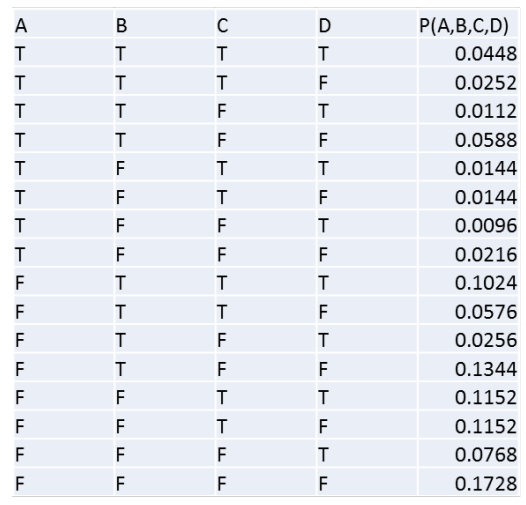

In [2]:
# calc marginal probabilities

A = 0.0448 + 0.0252 + 0.0112 + 0.0588 + 0.0144 + 0.0144 + 0.0096 + 0.0216
B = 0.0448 + 0.0252 + 0.0112 + 0.0588 + 0.1024 + 0.0576 + 0.0256 + 0.1344
C = 0.0448 + 0.0252 + 0.0144 + 0.0144 + 0.1024 + 0.0576 + 0.1152 + 0.1152
D = 0.0448 + 0.0112 + 0.0144 + 0.0096 + 0.1024 + 0.0256 + 0.1152 + 0.0768

a. Are A and B independent?

In [3]:
# P(A,B)
PAB = 0.0448 + 0.0252 + 0.0112 + 0.0588

# create table
joint_table = TabularCPD(variable = 'Probability', 
                   variable_card = 4, 
                   values = [[A], 
                             [B],
                             [A * B],
                             [PAB]], 
                   evidence = ['Value'],
                   evidence_card = [1]
                  )

# 0 = P(A)
# 1 = P(B)
# 2 = P(A)P(B)
# 3 = P(A,B)
print(joint_table)

+----------------+---------------------+
| Value          | Value(0)            |
+----------------+---------------------+
| Probability(0) | 0.2                 |
+----------------+---------------------+
| Probability(1) | 0.45999999999999996 |
+----------------+---------------------+
| Probability(2) | 0.092               |
+----------------+---------------------+
| Probability(3) | 0.14                |
+----------------+---------------------+


0.0920 ≠ 0.1400 so A and B are not independent.

b. Are A and C independent?

In [4]:
# P(A,C)
PAC = 0.0448 + 0.0252 + 0.0144 + 0.0144

# create table
joint_table = TabularCPD(variable = 'Probability', 
                   variable_card = 4, 
                   values = [[A], 
                             [C],
                             [A * C],
                             [PAC]], 
                   evidence = ['Value'],
                   evidence_card = [1]
                  )

# 0 = P(A)
# 1 = P(C)
# 2 = P(A)P(C)
# 3 = P(A,C)
print(joint_table)

+----------------+---------------------+
| Value          | Value(0)            |
+----------------+---------------------+
| Probability(0) | 0.2                 |
+----------------+---------------------+
| Probability(1) | 0.48919999999999997 |
+----------------+---------------------+
| Probability(2) | 0.09784             |
+----------------+---------------------+
| Probability(3) | 0.0988              |
+----------------+---------------------+


0.09784 ≠ 0.0988 so A and C are not independent.

c. Are A and C independent given B?

In [5]:
# P(C,B)
PCB = 0.0448 + 0.0252 + 0.1024 + 0.0576

# create table
joint_table = TabularCPD(variable = 'Probability', 
                   variable_card = 4, 
                   values = [[PAB / B], 
                             [PCB / B],
                             [(PAB / B) * (PCB / B)],
                             [(0.0448 + 0.0252) / B]], 
                   evidence = ['Value'],
                   evidence_card = [1]
                  )

# 0 = P(A|B)
# 1 = P(C|B)
# 2 = P(A|B)P(C|B)
# 3 = P(A,C|B)
print(joint_table)

+----------------+--------------------+
| Value          | Value(0)           |
+----------------+--------------------+
| Probability(0) | 0.3043478260869566 |
+----------------+--------------------+
| Probability(1) | 0.5                |
+----------------+--------------------+
| Probability(2) | 0.1521739130434783 |
+----------------+--------------------+
| Probability(3) | 0.1521739130434783 |
+----------------+--------------------+


0.1521 = 0.1521 so A and C given B is independent.

d. Are A and D independent?

In [6]:
# P(A,D)
PAD = 0.0448 + 0.0112 + 0.0144 + 0.0096

# create table
joint_table = TabularCPD(variable = 'Probability', 
                   variable_card = 4, 
                   values = [[A], 
                             [D],
                             [A * D],
                             [(0.0448 + 0.0252) / B]], 
                   evidence = ['Value'],
                   evidence_card = [1]
                  )

# 0 = P(A)
# 1 = P(D)
# 2 = P(A)P(D)
# 3 = P(A,D)
print(joint_table)

+----------------+---------------------+
| Value          | Value(0)            |
+----------------+---------------------+
| Probability(0) | 0.2                 |
+----------------+---------------------+
| Probability(1) | 0.4                 |
+----------------+---------------------+
| Probability(2) | 0.08000000000000002 |
+----------------+---------------------+
| Probability(3) | 0.1521739130434783  |
+----------------+---------------------+


0.08 = 0.08 so A and D are independent.

e. Are A and D independent given C?

In [7]:
# P(DC)
PDC = 0.0448 + 0.0144 + 0.1024 + 0.1152

# create table
joint_table = TabularCPD(variable = 'Probability', 
                   variable_card = 4, 
                   values = [[PAC / C], 
                             [PDC / C],
                             [(PAC / C) * (PDC / C)],
                             [(0.0448 + 0.0144) / C]], 
                   evidence = ['Value'],
                   evidence_card = [1]
                  )

# 0 = P(A|C)
# 1 = P(D|C)
# 2 = P(A|C)P(D|C)
# 3 = P(A,D|C)
print(joint_table)

+----------------+---------------------+
| Value          | Value(0)            |
+----------------+---------------------+
| Probability(0) | 0.2019623875715454  |
+----------------+---------------------+
| Probability(1) | 0.5658217497955847  |
+----------------+---------------------+
| Probability(2) | 0.11427471152862587 |
+----------------+---------------------+
| Probability(3) | 0.12101390024529846 |
+----------------+---------------------+


0.1143 ≠ 0.1210 so A and D given C is not independent.

### Problem 5
For the given problem, construct a Bayesian Network and general-purpose decision tree. Compare results. What differences do you observe? Explain. Predict the probability that children would be playing outdoors given weather conditions.

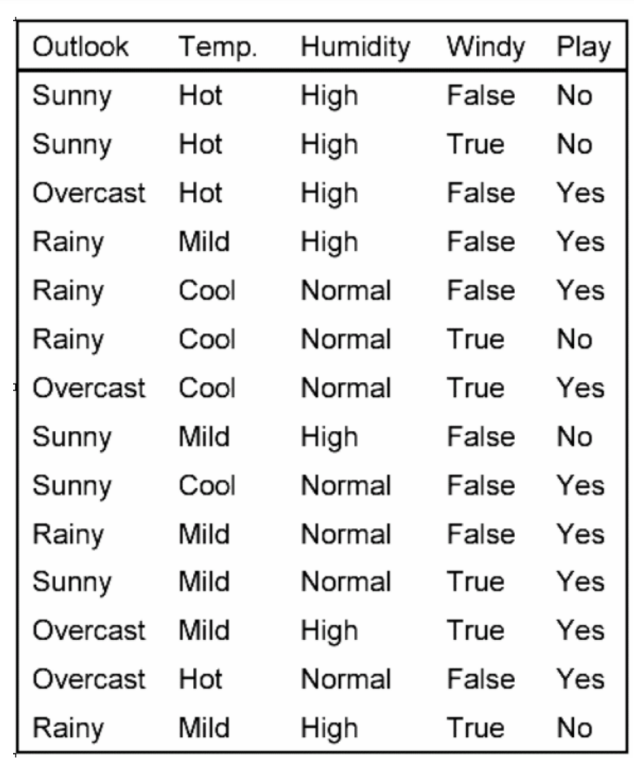

In [8]:
# create Bayesian network
model = BayesianNetwork([('Outlook', 'Play'), ('Temp', 'Play'), ('Humidity', 'Play'), ('Windy', 'Play')])

In [9]:
# Data
outlook = [[0.2143, 0.1429, 0.0000], [0.1429, 0.2143, 0.2857]]

temp = [[0.0714, 0.1429, 0.1429], [0.2143, 0.2857, 0.1429]]

humidity = [[0.0714, 0.2857], [0.4286, 0.2143]]

windy = [[0.1429, 0.2143], [0.4286, 0.2143]]

play = [[0, 0, 0, 0, 0, 0, 0.0714, 0, 0, 0, 0.0714, 0.0714,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0.0714, 0, 0, 0, 0, 0, 0.0714, 0, 0, 0, 0],
        [0.0714, 0, 0, 0, 0, 0.0714, 0, 0, 0, 0, 0, 0,
         0, 0.0714, 0, 0, 0, 0, 0, 0.0714, 0.0714, 0, 0.0714, 0,
         0.0714, 0, 0, 0, 0.0714, 0, 0.0714, 0, 0, 0, 0, 0]]

In [10]:
# Make CPDs
cpd_outlook = TabularCPD(variable="Play",
                         variable_card=2,
                         values=outlook,
                         evidence=["Outlook"],
                         evidence_card=[3])

cpd_temp = TabularCPD(variable="Play",
                      variable_card=2,
                      values=temp,
                      evidence=["Temp"],
                      evidence_card=[3])

cpd_humidity = TabularCPD(variable="Play",
                          variable_card=2,
                          values=humidity,
                          evidence=["Humidity"],
                          evidence_card=[2])

cpd_windy = TabularCPD(variable="Play",
                       variable_card=2,
                       values=windy,
                       evidence=["Windy"],
                       evidence_card=[2])

cpd_play = TabularCPD(variable="Play",
                      variable_card=2,
                      values=play,
                      evidence=["Outlook", "Temp", "Humidity", "Windy"],
                      evidence_card=[3, 3, 2, 2]
                     )

In [11]:
# Associating the parameters with the model structure
model.add_cpds(cpd_outlook, cpd_temp, cpd_humidity, cpd_windy, cpd_play)

# Checking if the cpds are valid for the model
model.check_model() # Will have an error b/c of rounding

ValueError: No CPD associated with Outlook

In [12]:
# Check for d-separation between variables

print(model.is_dconnected("Outlook", "Humidity"))
print(model.is_dconnected("Outlook", "Temp", observed=["Play"]))

False
True


In [13]:
# Get all d-connected nodes

print(model.active_trail_nodes("Outlook"))
print(model.active_trail_nodes("Temp"))
print(model.active_trail_nodes("Humidity"))
print(model.active_trail_nodes("Windy"))

{'Outlook': {'Outlook', 'Play'}}
{'Temp': {'Play', 'Temp'}}
{'Humidity': {'Humidity', 'Play'}}
{'Windy': {'Windy', 'Play'}}


In [14]:
# Get all model implied independence conditions

model.get_independencies()

(Windy ⟂ Humidity, Outlook, Temp)
(Windy ⟂ Outlook, Temp | Humidity)
(Windy ⟂ Humidity, Temp | Outlook)
(Windy ⟂ Humidity, Outlook | Temp)
(Windy ⟂ Temp | Humidity, Outlook)
(Windy ⟂ Outlook | Humidity, Temp)
(Windy ⟂ Humidity | Outlook, Temp)
(Humidity ⟂ Windy, Outlook, Temp)
(Humidity ⟂ Outlook, Temp | Windy)
(Humidity ⟂ Windy, Temp | Outlook)
(Humidity ⟂ Windy, Outlook | Temp)
(Humidity ⟂ Temp | Windy, Outlook)
(Humidity ⟂ Outlook | Windy, Temp)
(Humidity ⟂ Windy | Outlook, Temp)
(Outlook ⟂ Windy, Humidity, Temp)
(Outlook ⟂ Humidity, Temp | Windy)
(Outlook ⟂ Windy, Temp | Humidity)
(Outlook ⟂ Windy, Humidity | Temp)
(Outlook ⟂ Temp | Windy, Humidity)
(Outlook ⟂ Humidity | Windy, Temp)
(Outlook ⟂ Windy | Humidity, Temp)
(Temp ⟂ Windy, Humidity, Outlook)
(Temp ⟂ Humidity, Outlook | Windy)
(Temp ⟂ Windy, Outlook | Humidity)
(Temp ⟂ Windy, Humidity | Outlook)
(Temp ⟂ Outlook | Windy, Humidity)
(Temp ⟂ Humidity | Windy, Outlook)
(Temp ⟂ Windy | Humidity, Outlook)

In [15]:
# Define the data
df = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

In [16]:
le_outlook = LabelEncoder()
df['Outlook'] = le_outlook.fit_transform(df['Outlook'])

le_temp = LabelEncoder()
df['Temp'] = le_outlook.fit_transform(df['Temp'])

le_humidity = LabelEncoder()
df['Humidity'] = le_outlook.fit_transform(df['Humidity'])

le_windy = LabelEncoder()
df['Windy'] = le_outlook.fit_transform(df['Windy'])

le_play = LabelEncoder()
df['Play'] = le_outlook.fit_transform(df['Play'])

In [17]:
# Split the data into features (X) and target variable (y)
X = df.drop('Play', axis=1)
y = df['Play']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Predict on the test data
y_pred = clf.predict(X_test)

In [20]:
# Evaluate the performance of the model
print(y_pred)
print()

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

[1 1 0]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

